In [11]:
#特征重要性 feature_importances_
import numpy as np
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.tree as st
import sklearn.metrics as sm
import matplotlib.pyplot as mp

boston =sd.load_boston()

#打乱原始数据集，拆分训练集与测试集
#random_state  随机种子，用于复现结果       shuffle 打乱，洗牌
x,y=su.shuffle(boston.data,boston.target,random_state=7)
train_size=int(len(x)*0.8)
#    \  转义、续行符（折行）、反斜杠
train_x,test_x,train_y,test_y=x[:train_size],x[train_size:],y[:train_size],y[train_size:]

#调用回归树模型 
model=st.DecisionTreeRegressor(max_depth=4)
model.fit(train_x,train_y)
pred_test_y=model.predict(test_x)
#评估结果
r=sm.r2_score(test_y,pred_test_y)
print(r)
dt_fi=model.feature_importances_  #data feature_importances_值越高，特征重要性越高
print('DT FI:',dt_fi)

#平均绝对值误差
print(sm.mean_absolute_error(test_y,pred_test_y))

#构建adaboost模型
import sklearn.ensemble as se
model=se.AdaBoostRegressor(model,n_estimators=400,random_state=7)   #树的数量
model.fit(train_x,train_y)
pred_test_y=model.predict(test_x)
r=sm.r2_score(test_y,pred_test_y)
print(r)
ada_fi=model.feature_importances_  #data feature_importances_值越高，特征重要性越高
print('AdaBoost FI:',ada_fi)

0.8202560889408634
DT FI: [0.02345866 0.         0.         0.         0.06146979 0.60552681
 0.         0.10473383 0.         0.         0.00460542 0.
 0.20020548]
2.7670975940796914
0.9068598725149652
AdaBoost FI: [0.03339581 0.00287794 0.00810414 0.00099482 0.0463733  0.27796803
 0.00884059 0.11267449 0.02459319 0.05455562 0.05567394 0.0194009
 0.35454723]


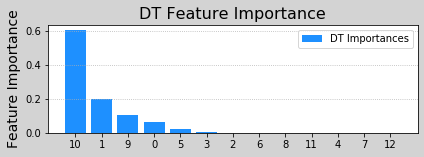

In [20]:
#画图，绘制重要特征
mp.figure('Feature Importance',facecolor='lightgray')
mp.subplot(211)#子图    2行1列，第一副
mp.title('DT Feature Importance',fontsize=16) 
mp.ylabel('Feature Importance',fontsize=14)
mp.grid(linestyle=":",axis='y') 
x=np.arange(dt_fi.size)
names=sorted_indices=dt_fi.argsort()[::-1]    #argsort函数返回的是数组值从小到大的索引值    [::-1]  倒序
dt_fi=dt_fi[sorted_indices]
mp.bar(x,dt_fi,0.8,color='dodgerblue',label='DT Importances')
mp.xticks(x,names[sorted_indices])
mp.legend()
mp.tight_layout()
mp.show()